In [1]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 1
# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.compat.v1.set_random_seed(seed_value)

2023-06-11 21:22:46.821816: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Simple RNN example

In [2]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

pip show tensorflow

In [4]:
# Make sample data and label data
sample = np.array([[[0],[1]],
          [[1],[1]],
          [[1],[2]]]
          )
label = np.array([1, 2, 0])

print(sample)

sample = to_categorical(sample)
print(sample)

label = to_categorical(label)
print(label)

[[[0]
  [1]]

 [[1]
  [1]]

 [[1]
  [2]]]
[[[1. 0. 0.]
  [0. 1. 0.]]

 [[0. 1. 0.]
  [0. 1. 0.]]

 [[0. 1. 0.]
  [0. 0. 1.]]]
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [5]:
# Build Model
model = Sequential()
model.add(layers.SimpleRNN(3,
            input_shape=(2, 3),
            activation='softmax'))
model.summary()

# Compile Model
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['acc'])
# Fit model
history = model.fit(sample,
          label,
          epochs=350
          )
# Predict Dinner
predict = model.predict(sample)
print(predict)
predict = np.argmax(predict,axis=1)
predict

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


2023-06-11 21:22:49.531499: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-11 21:22:49.545323: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/350
1/1 [==============================] - 1s 1s/step - loss: 1.1956 - acc: 0.3333
Epoch 2/350
1/1 [==============================] - 0s 8ms/step - loss: 1.1938 - acc: 0.3333
Epoch 3/350
1/1 [==============================] - 0s 8ms/step - loss: 1.1920 - acc: 0.3333
Epoch 4/350
1/1 [==============================] - 0s 8ms/step - loss: 1.1903 - acc: 0.3333
Epoch 5/350
1/1 [==============================] - 0s 8ms/step - loss: 1.1885 - acc: 0.3333
Epoch 6/350
1/1 [==============================] - 0s 18ms/step - loss: 1.1867 - acc: 0.3333
Epoch 7/350
1/1 [==============================] - 0s 7ms/step - loss: 1.1850 - acc: 0.3333
Epoch 8/350
1/1 [==============================] - 0s 7ms/step - loss: 1.1832 - acc: 0.3333
Epoch 9/350
1/1 [==============================] - 0s 7ms/step - loss: 1.1815 - acc: 0.3333
Epoch 10/350
1/1 [==============================] - 0s 7ms/step - loss: 1.1798 - acc: 0.3333
Epoch 11/350
1/1 [==============================] - 0s 7ms/step - loss: 1.1781 

array([1, 1, 0])

In [6]:
# Build Model
model = Sequential()
model.add(layers.SimpleRNN(10,
            input_shape=(2, 3),
            activation='softmax'))
model.summary()

# Compile Model
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['acc'])
# Fit model
history = model.fit(sample,
          label,
          epochs=350
          )
# Predict Dinner
predict = model.predict(sample)
print(predict)
predict = np.argmax(predict,axis=1)
predict

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 10)                140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
Epoch 1/350


ValueError: in user code:

    File "/home/team_1/miniconda3/envs/ann_demo/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/home/team_1/miniconda3/envs/ann_demo/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/team_1/miniconda3/envs/ann_demo/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/home/team_1/miniconda3/envs/ann_demo/lib/python3.10/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/team_1/miniconda3/envs/ann_demo/lib/python3.10/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/home/team_1/miniconda3/envs/ann_demo/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/team_1/miniconda3/envs/ann_demo/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/team_1/miniconda3/envs/ann_demo/lib/python3.10/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/team_1/miniconda3/envs/ann_demo/lib/python3.10/site-packages/keras/losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/team_1/miniconda3/envs/ann_demo/lib/python3.10/site-packages/keras/backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 3) and (None, 10) are incompatible


In [7]:
# RNN+DNN Model
model = Sequential()
model.add(layers.SimpleRNN(10,
                           input_shape=(2, 3)))
model.add(layers.Dense(3, activation='softmax'))
model.summary()
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(sample,
                    label,
                    epochs=100
                    )


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 10)                140       
                                                                 
 dense (Dense)               (None, 3)                 33        
                                                                 
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 622ms/step - loss: 1.2213 - acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 1.2122 - acc: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 1.2032 - acc: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 1.1941 - acc: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - 

In [8]:
predict = model.predict(sample)
print(predict)
predict = np.argmax(predict,axis=1)
predict


1/1 [==============================] - 0s 161ms/step
[[0.11762308 0.7103787  0.17199816]
 [0.40620366 0.09672268 0.4970736 ]
 [0.53527665 0.11633861 0.34838474]]


array([1, 2, 0])

In [9]:
tf.keras.backend.clear_session()

# Realstic Data - BTC

In [10]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

In [11]:
data = pd.read_csv('BTC-USD.csv')

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


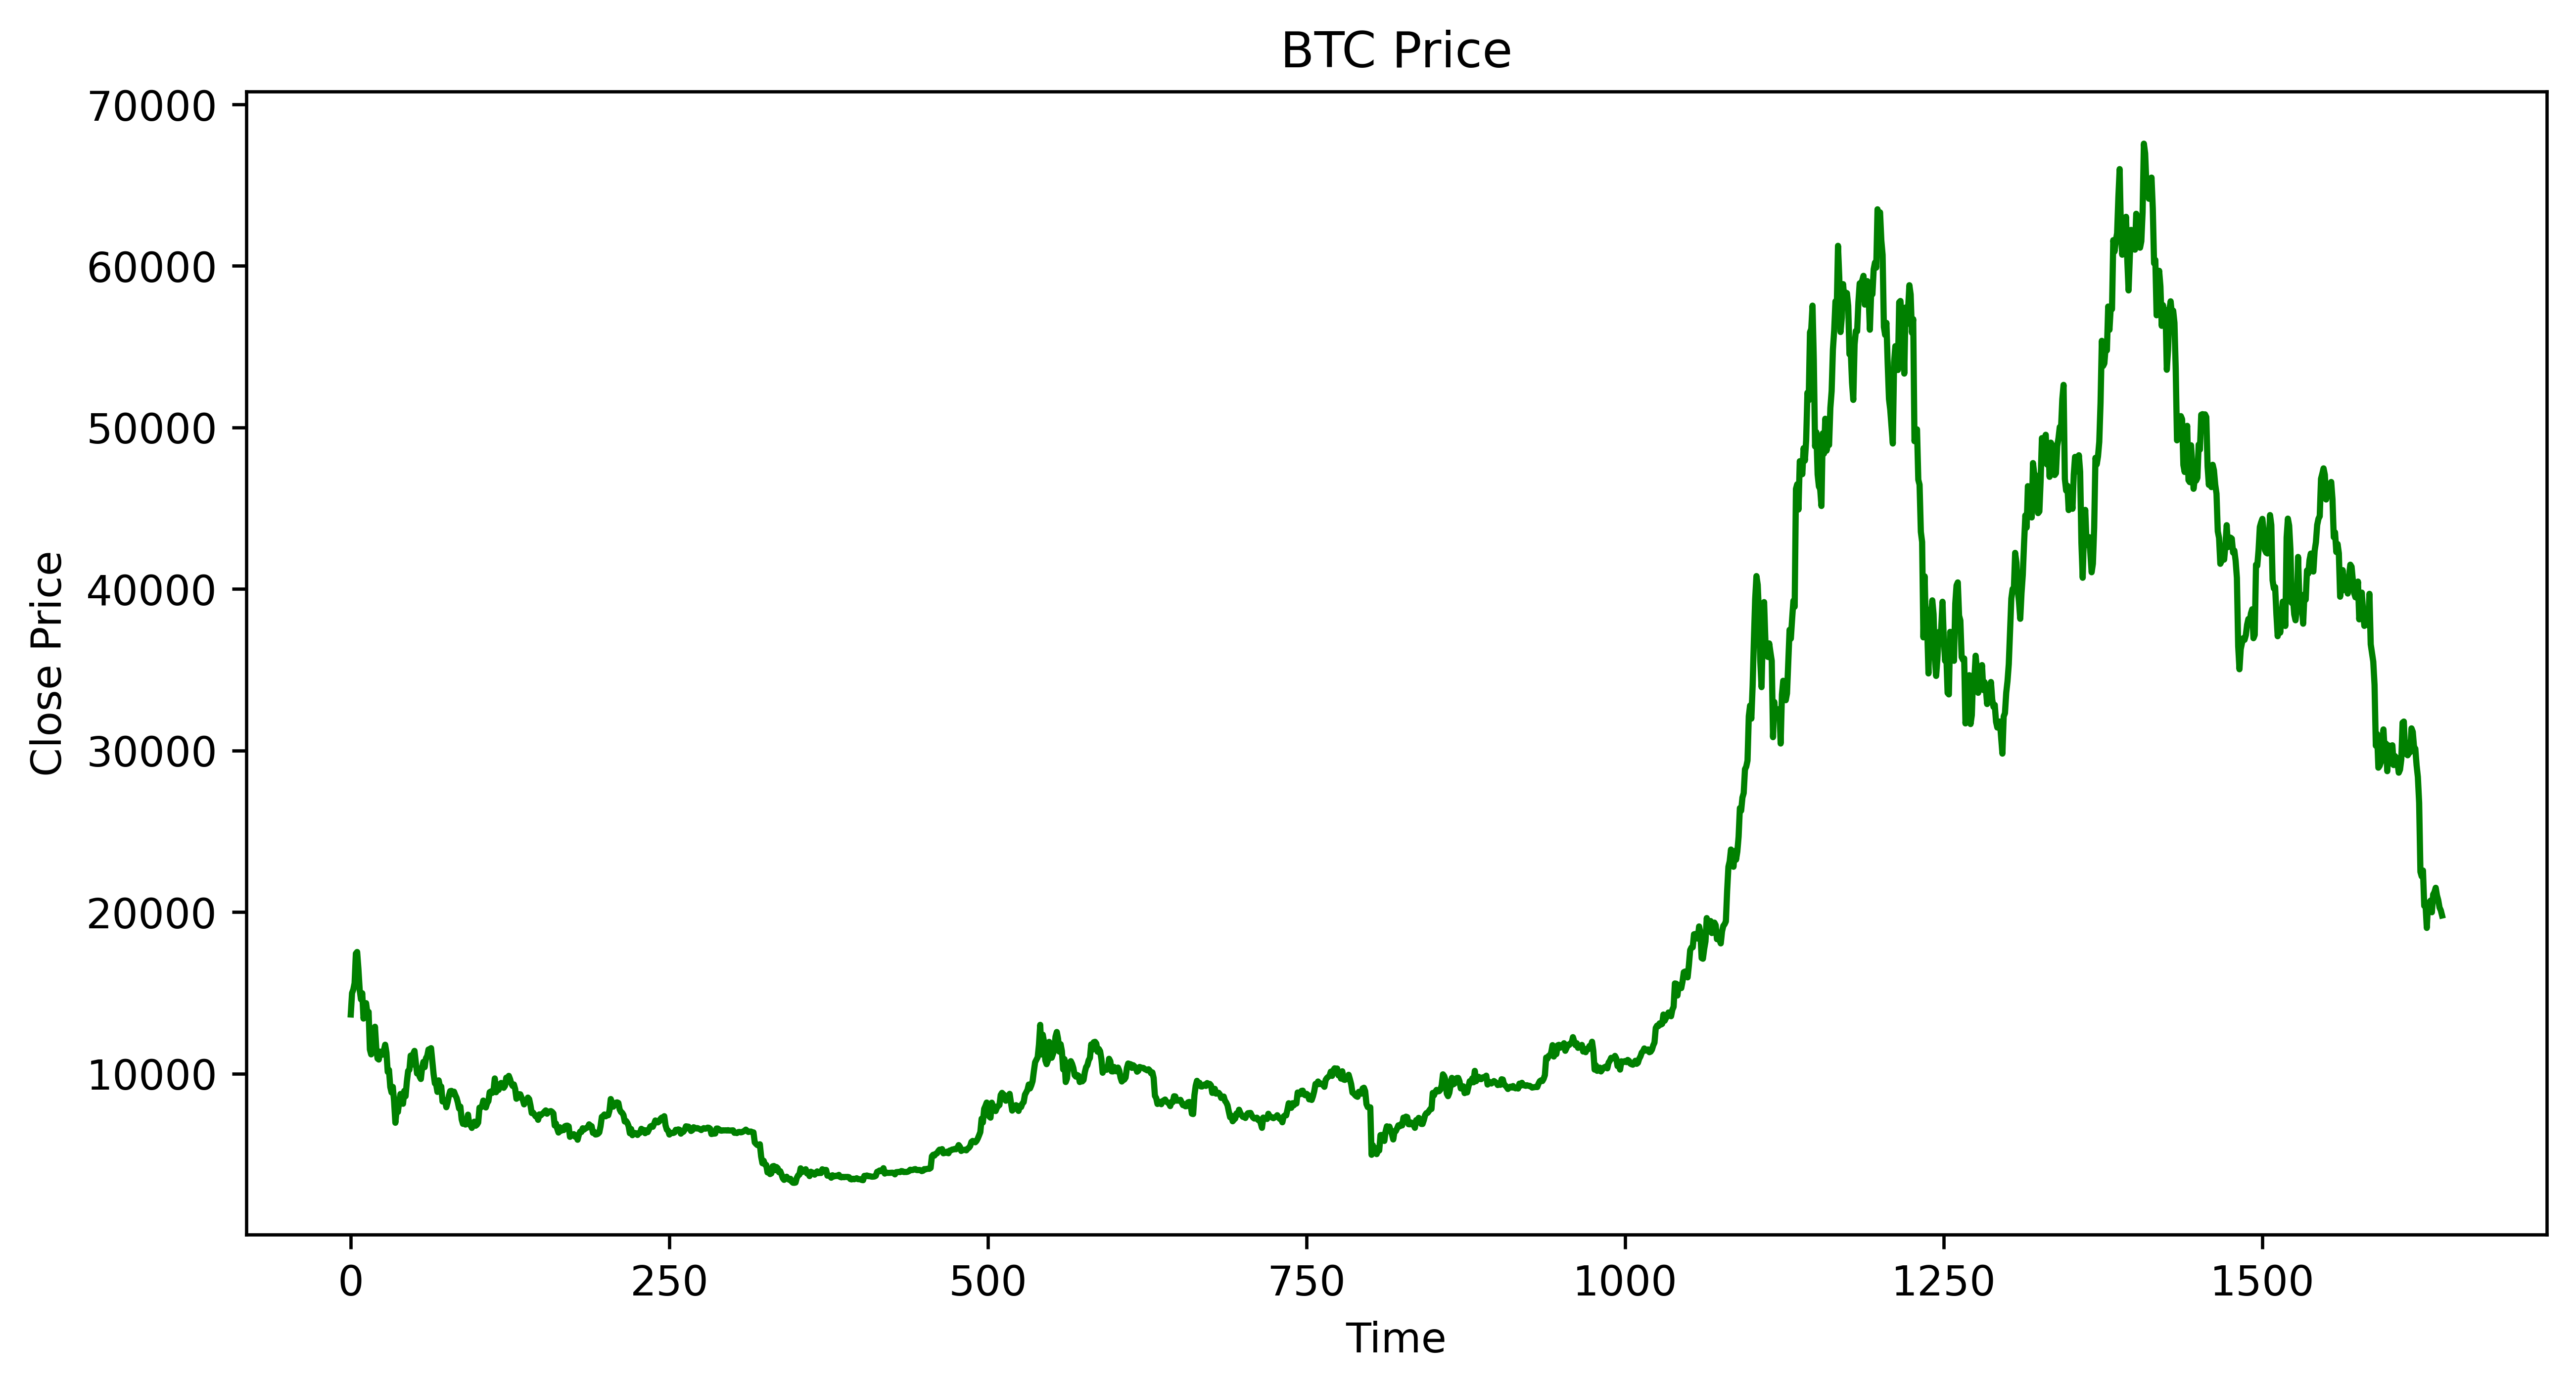

In [12]:
data=data['Close']
plt.figure(figsize=(10,5),dpi=600)
plt.plot(data, color ='green')
plt.ylabel('Close Price')
plt.title('BTC Price')
plt.xlabel('Time')
plt.show()

In [13]:

split =int(0.8*data.shape[0])
Train,Test  = data[0:split] , data[split:]

val_split=int(0.8*Train.shape[0])
Train,Val=Train[0:val_split] , data[val_split:]
Val=Val.reset_index(drop=True)
#Test=Test.reset_index(drop=True)

In [14]:
Test


1313    42816.500000
1314    44555.800781
1315    43798.117188
1316    46365.402344
1317    45585.031250
            ...     
1637    21027.294922
1638    20735.478516
1639    20280.634766
1640    20104.023438
1641    19784.726563
Name: Close, Length: 329, dtype: float64

In [15]:
Test=Test.reset_index(drop=True)
Test

0      42816.500000
1      44555.800781
2      43798.117188
3      46365.402344
4      45585.031250
           ...     
324    21027.294922
325    20735.478516
326    20280.634766
327    20104.023438
328    19784.726563
Name: Close, Length: 329, dtype: float64

In [16]:
sc = MinMaxScaler(feature_range = (0, 1))
#需將資料做reshape的動作，使其shape為(資料長度,1) 
train_set= Train.values.reshape(-1,1)
training_set_scaled = sc.fit_transform(train_set)
val_set= Val.values.reshape(-1,1)
val_set_scaled = sc.transform(val_set)
test_set = Test.values.reshape(-1,1)
test_set_scaled = sc.transform(test_set)

X_train = [] 
y_train = []
for i in range(5,len(train_set)):
    X_train.append(training_set_scaled[i-5:i]) 
    y_train.append(training_set_scaled[i]) 
X_train, y_train = np.array(X_train), np.array(y_train) 
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

X_val = [] 
y_val = []
for i in range(5,len(val_set)):
    X_val.append(val_set_scaled[i-5:i]) 
    y_val.append(val_set_scaled[i]) 
X_val, y_val = np.array(X_val), np.array(y_val) 
X_val = np.reshape(X_val,(X_val.shape[0], X_val.shape[1], 1))

X_test = []
y_test = []
for i in range(5,len(test_set)):
    X_test.append(training_set_scaled[i-5:i]) 
    y_test.append(training_set_scaled[i])
X_test, y_test = np.array(X_test), np.array(y_test) 
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [17]:
X_train[0]

array([[0.72919977],
       [0.82191337],
       [0.83723155],
       [0.86509673],
       [0.99317716]])

# Fit & compile the model

In [18]:
keras.backend.clear_session()
model = keras.models.Sequential([
    LSTM(32, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
opt=Adam(learning_rate=0.002,beta_1=0.95)
model.compile(optimizer=opt, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32,validation_data=(X_val,y_val))

Epoch 1/100
33/33 [==============================] - 2s 24ms/step - loss: 0.0254 - val_loss: 1.7195
Epoch 2/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0056 - val_loss: 0.5462
Epoch 3/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.3030
Epoch 4/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.2574
Epoch 5/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.3489
Epoch 6/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.3986
Epoch 7/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.4294
Epoch 8/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.4218
Epoch 9/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.4386
Epoch 10/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.4612
Epoch 11

In [20]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'val_loss'])

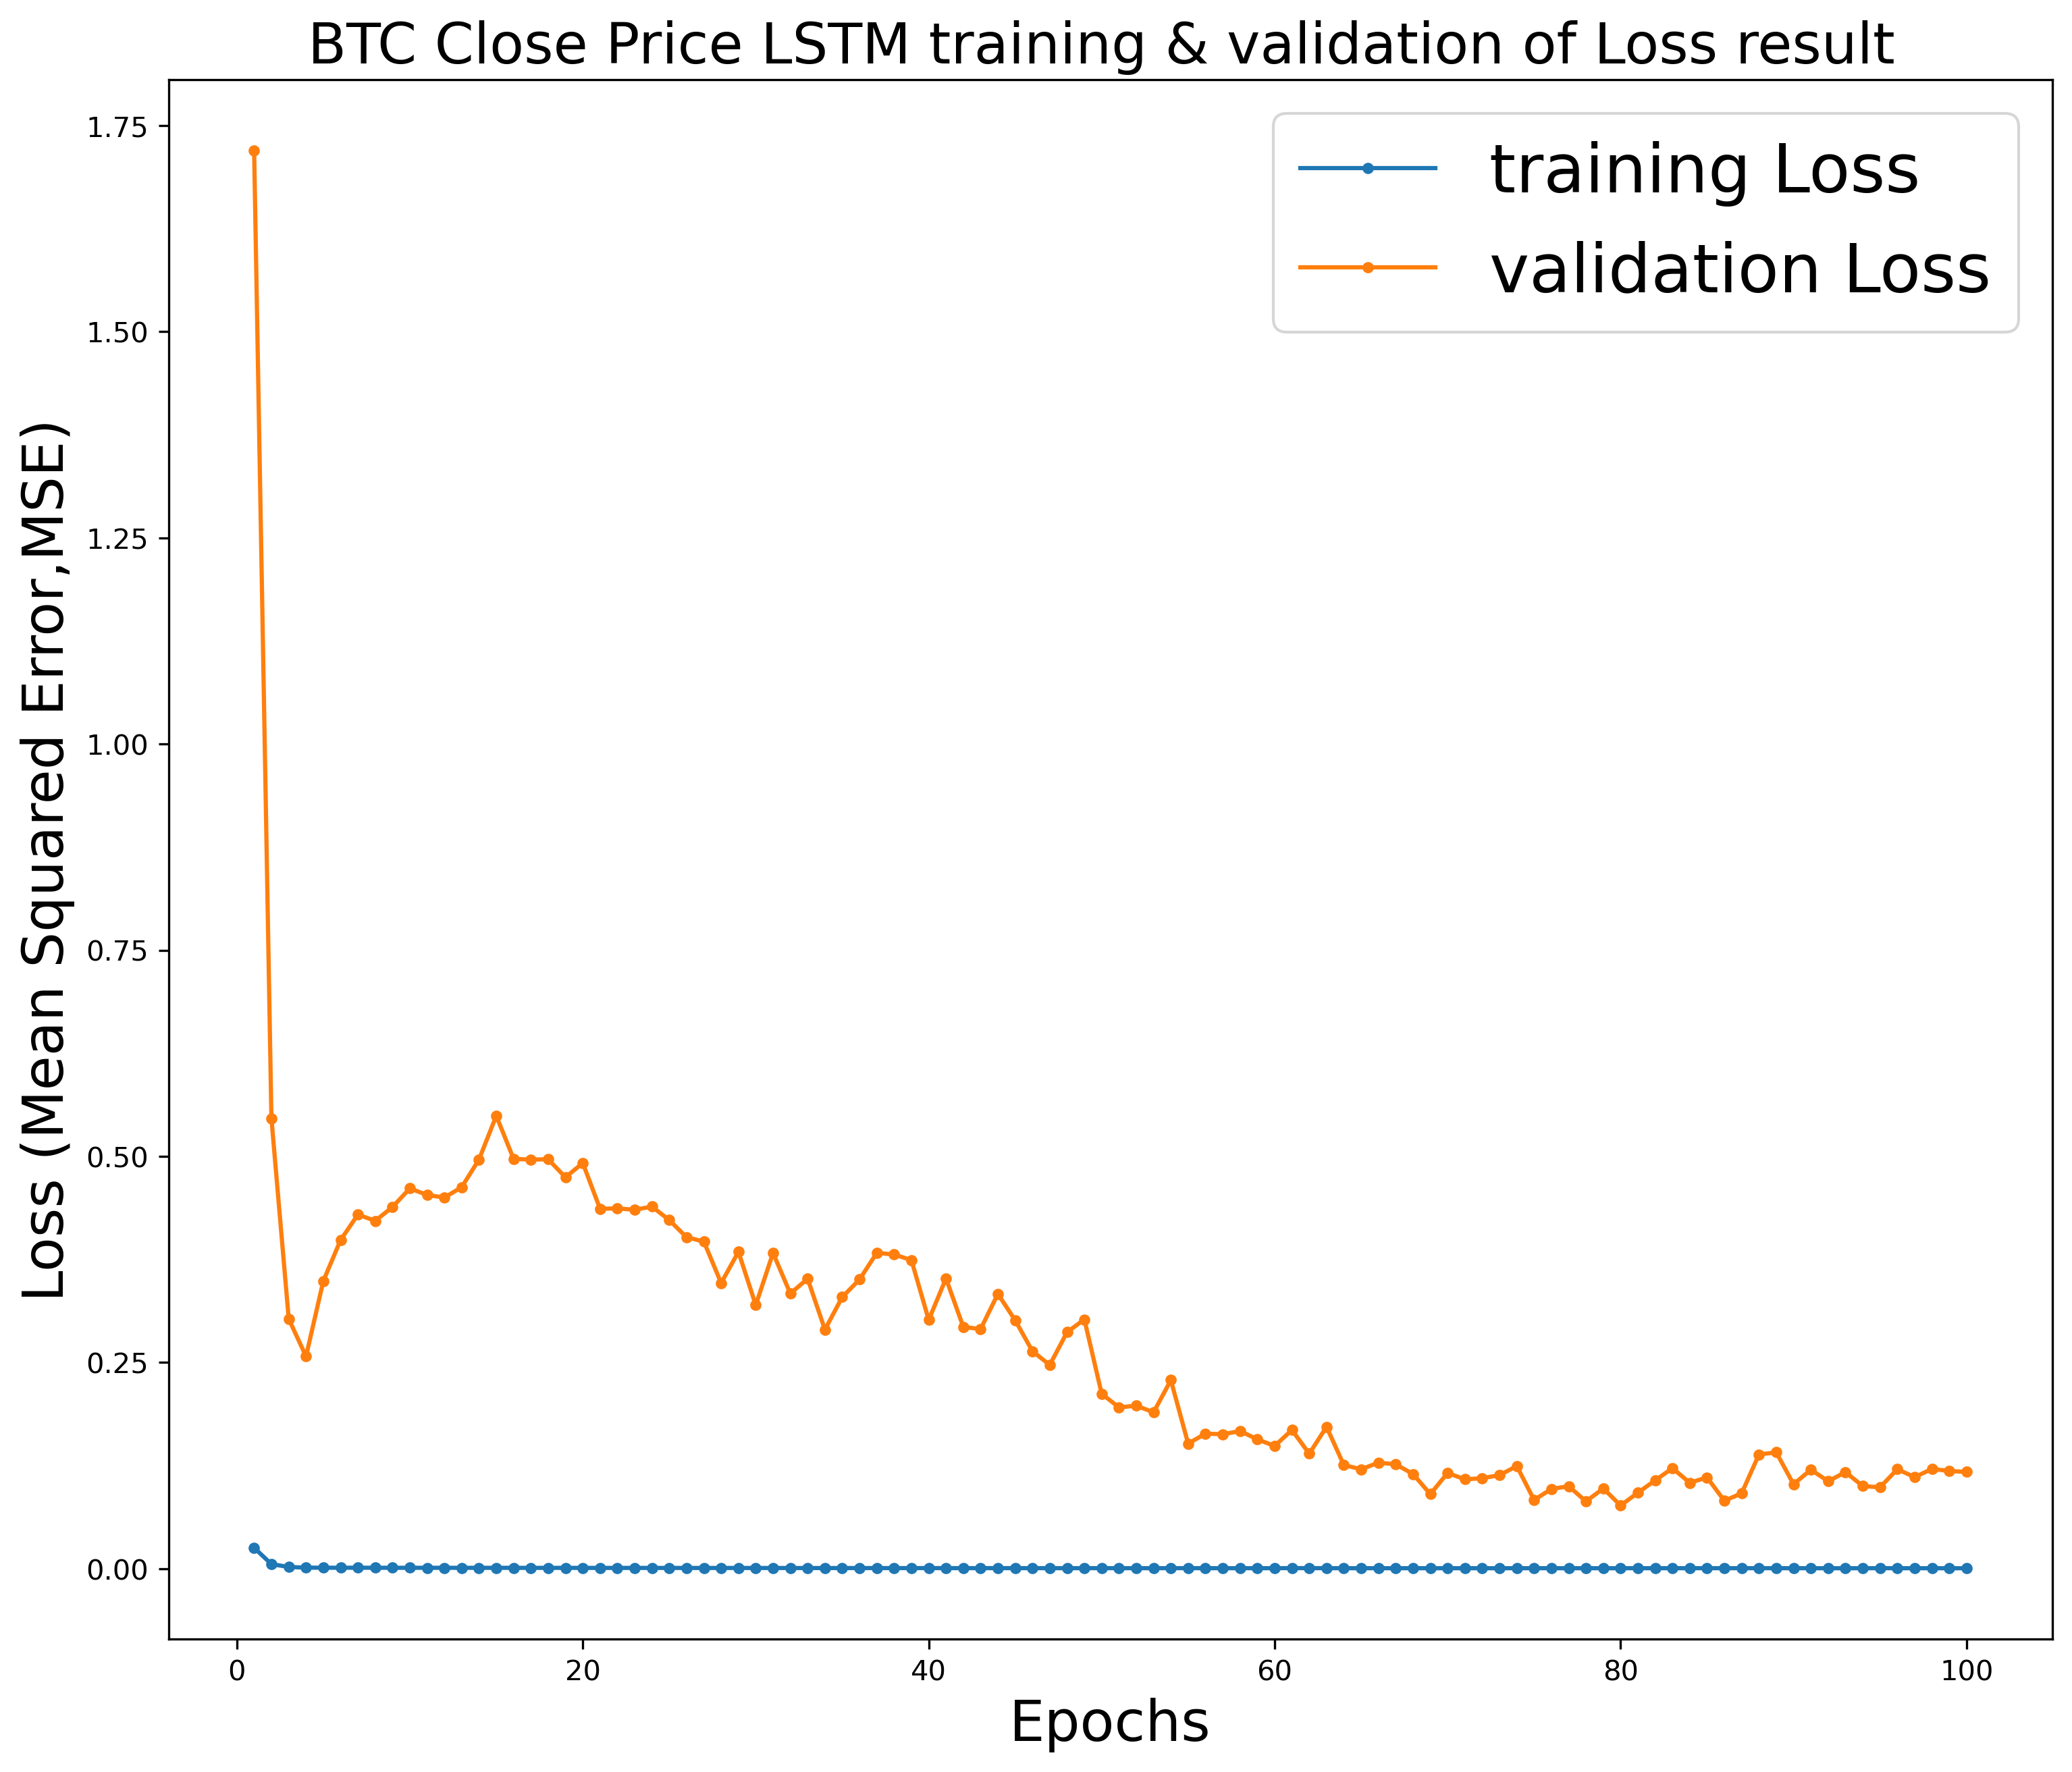

In [21]:
#Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Mean Squared Error,MSE)',fontsize=20)
plt.title('BTC Close Price LSTM training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

# Testing

In [22]:

predicted_price = model.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_price = sc.inverse_transform(predicted_price)
actual_price = sc.inverse_transform(y_test)

11/11 [==============================] - 0s 2ms/step


In [23]:
df1 = pd.DataFrame(predicted_price)
df2 = pd.DataFrame(actual_price)

df1.columns = ['Pred']
df2.columns = ['Actual']

merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv('output.csv', index=False)

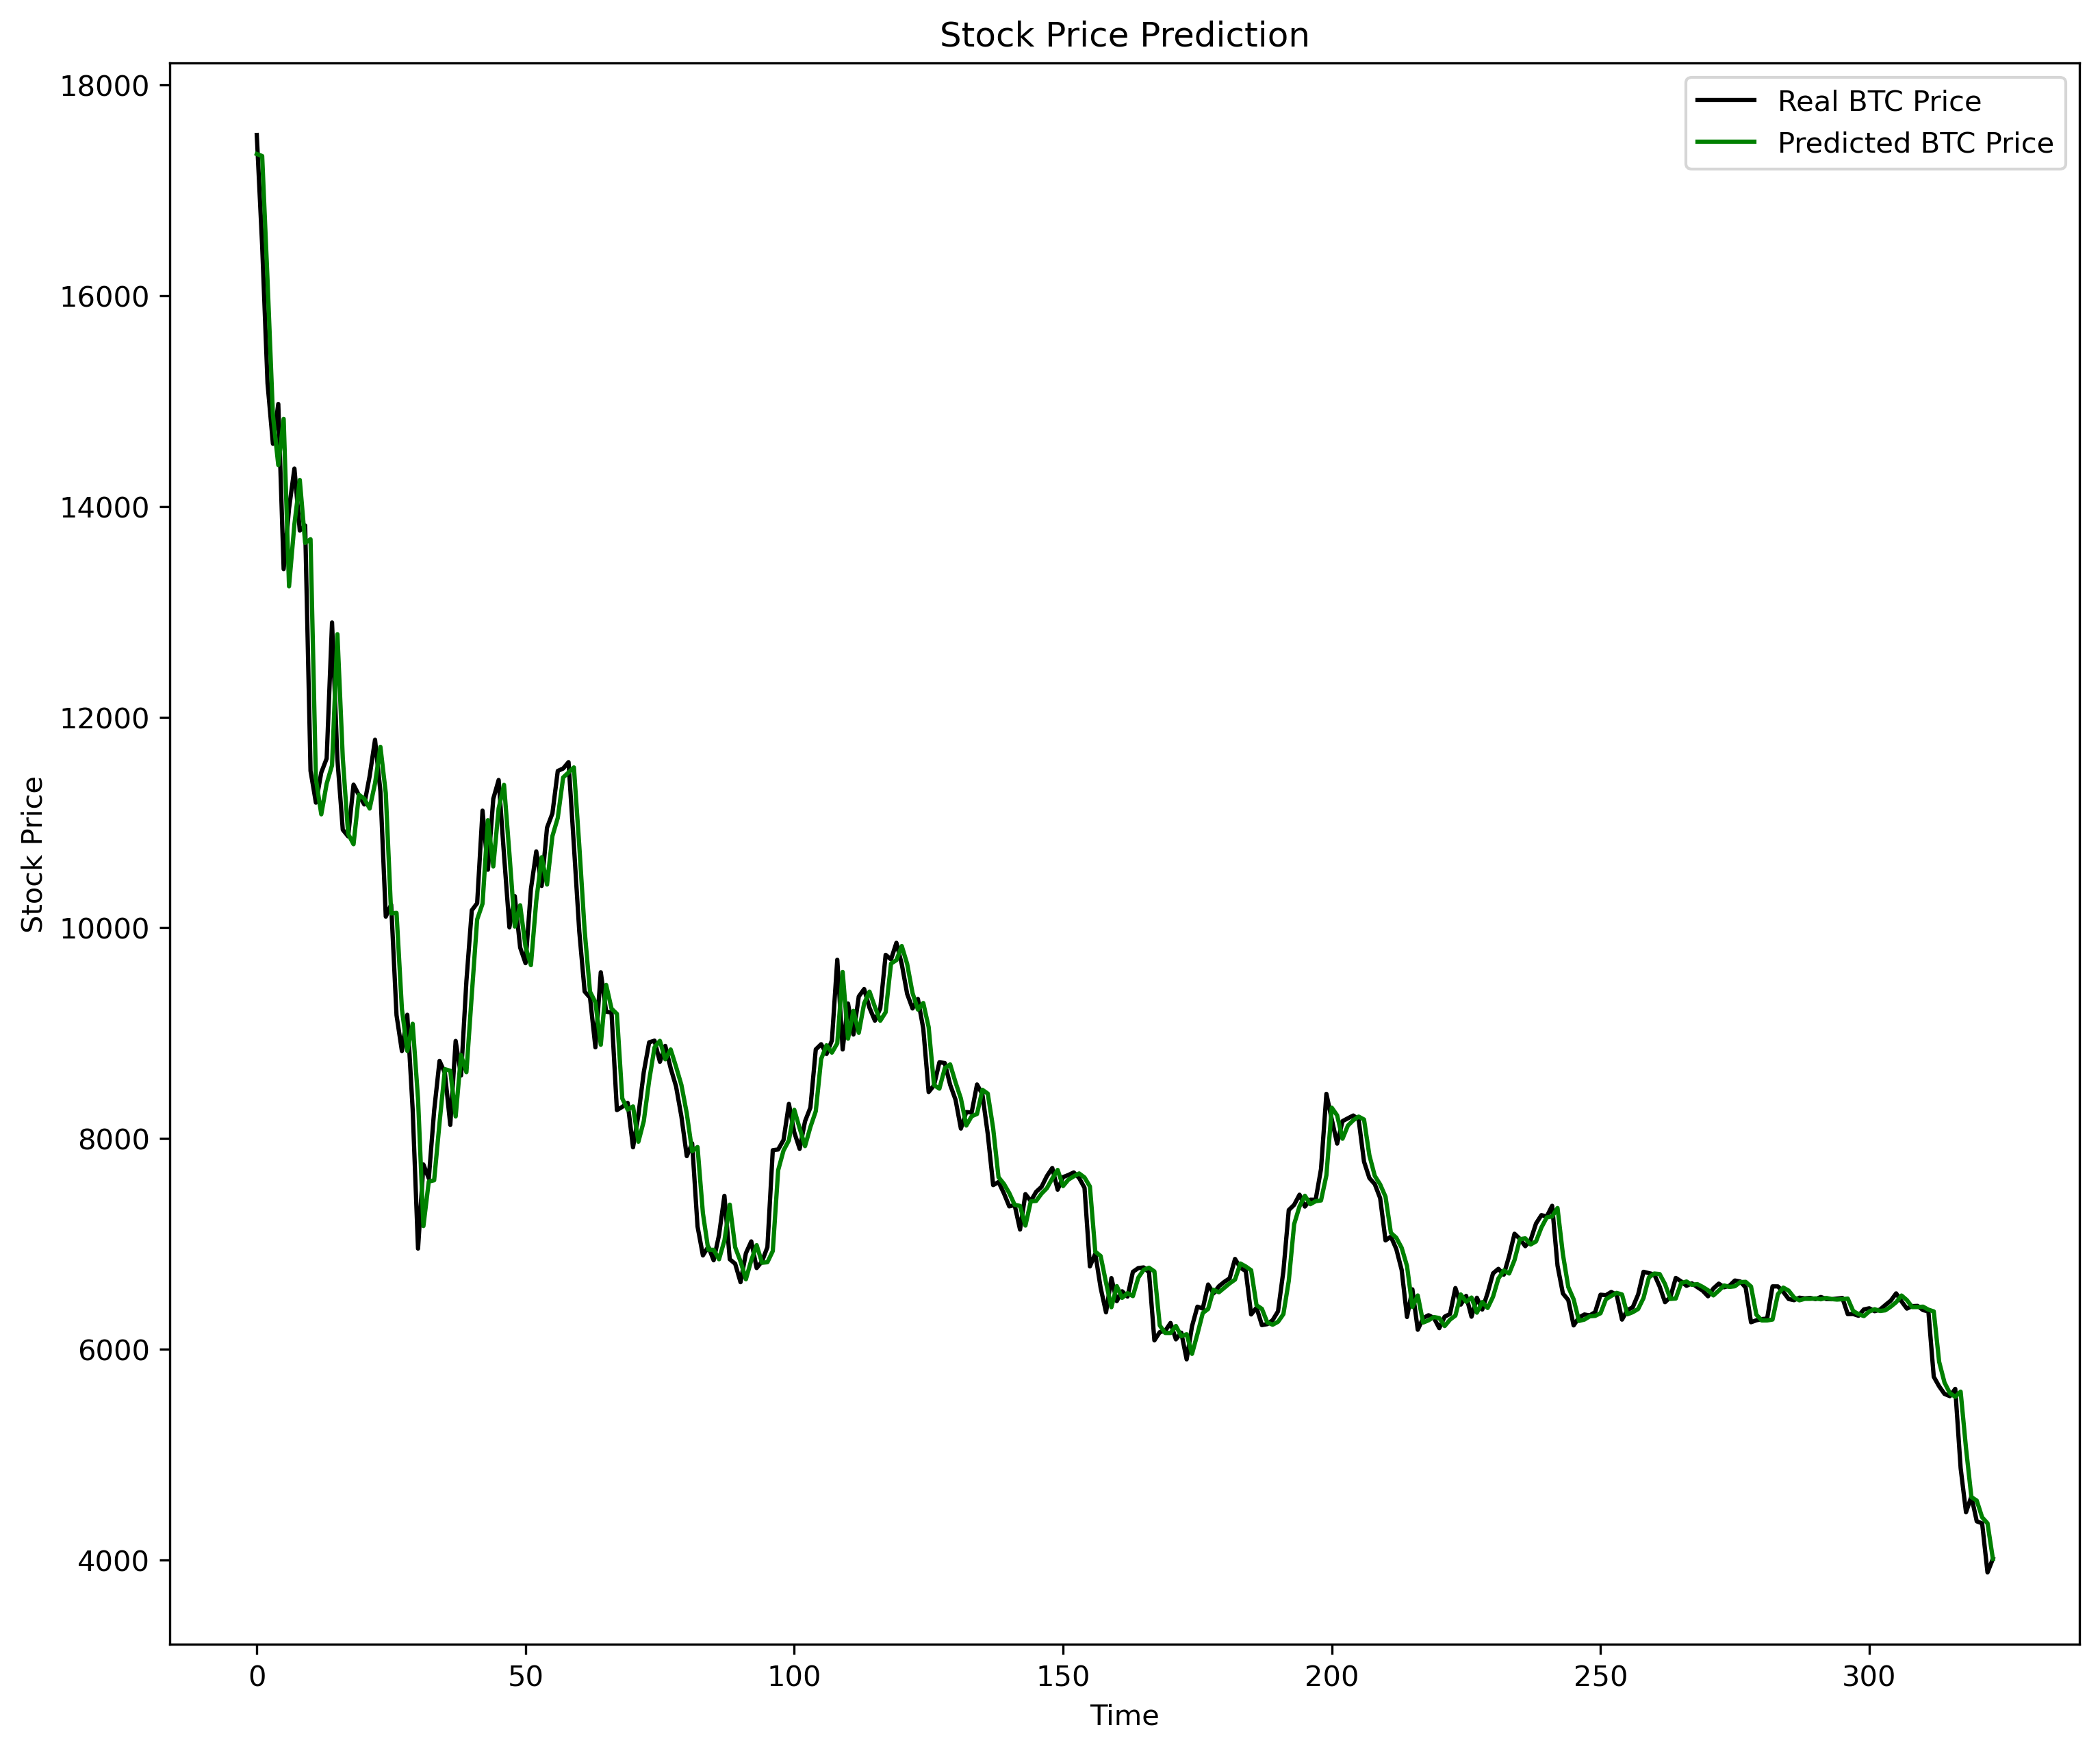

In [24]:
plt.figure(figsize=(12,10),dpi=300)
plt.plot(actual_price, color = 'black', label = 'Real BTC Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted BTC Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Improve the model

## Build model & Compile & Fit

In [25]:
keras.backend.clear_session()
model = Sequential()
model.add(LSTM(units = 64,return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 32,activation='relu'))
model.add(Dense(units = 1))
model.summary()
opt=Adam(learning_rate=0.002,beta_1=0.95)
model.compile(optimizer = opt, loss = 'mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             16896     
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


## Plot the history of training and validation

In [26]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32,validation_data=(X_val,y_val))

Epoch 1/100
33/33 [==============================] - 3s 32ms/step - loss: 0.0332 - val_loss: 1.5636
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: 0.0058 - val_loss: 0.0606
Epoch 3/100
33/33 [==============================] - 1s 25ms/step - loss: 0.0025 - val_loss: 0.7599
Epoch 4/100
33/33 [==============================] - 1s 20ms/step - loss: 0.0020 - val_loss: 0.0531
Epoch 5/100
33/33 [==============================] - 1s 24ms/step - loss: 0.0020 - val_loss: 0.0893
Epoch 6/100
33/33 [==============================] - 1s 23ms/step - loss: 0.0017 - val_loss: 0.1352
Epoch 7/100
33/33 [==============================] - 1s 22ms/step - loss: 0.0018 - val_loss: 0.0727
Epoch 8/100
33/33 [==============================] - 1s 22ms/step - loss: 0.0017 - val_loss: 0.1454
Epoch 9/100
33/33 [==============================] - 1s 26ms/step - loss: 0.0017 - val_loss: 0.1553
Epoch 10/100
33/33 [==============================] - 1s 22ms/step - loss: 0.0017 - val_loss: 0.1720

In [27]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'val_loss'])

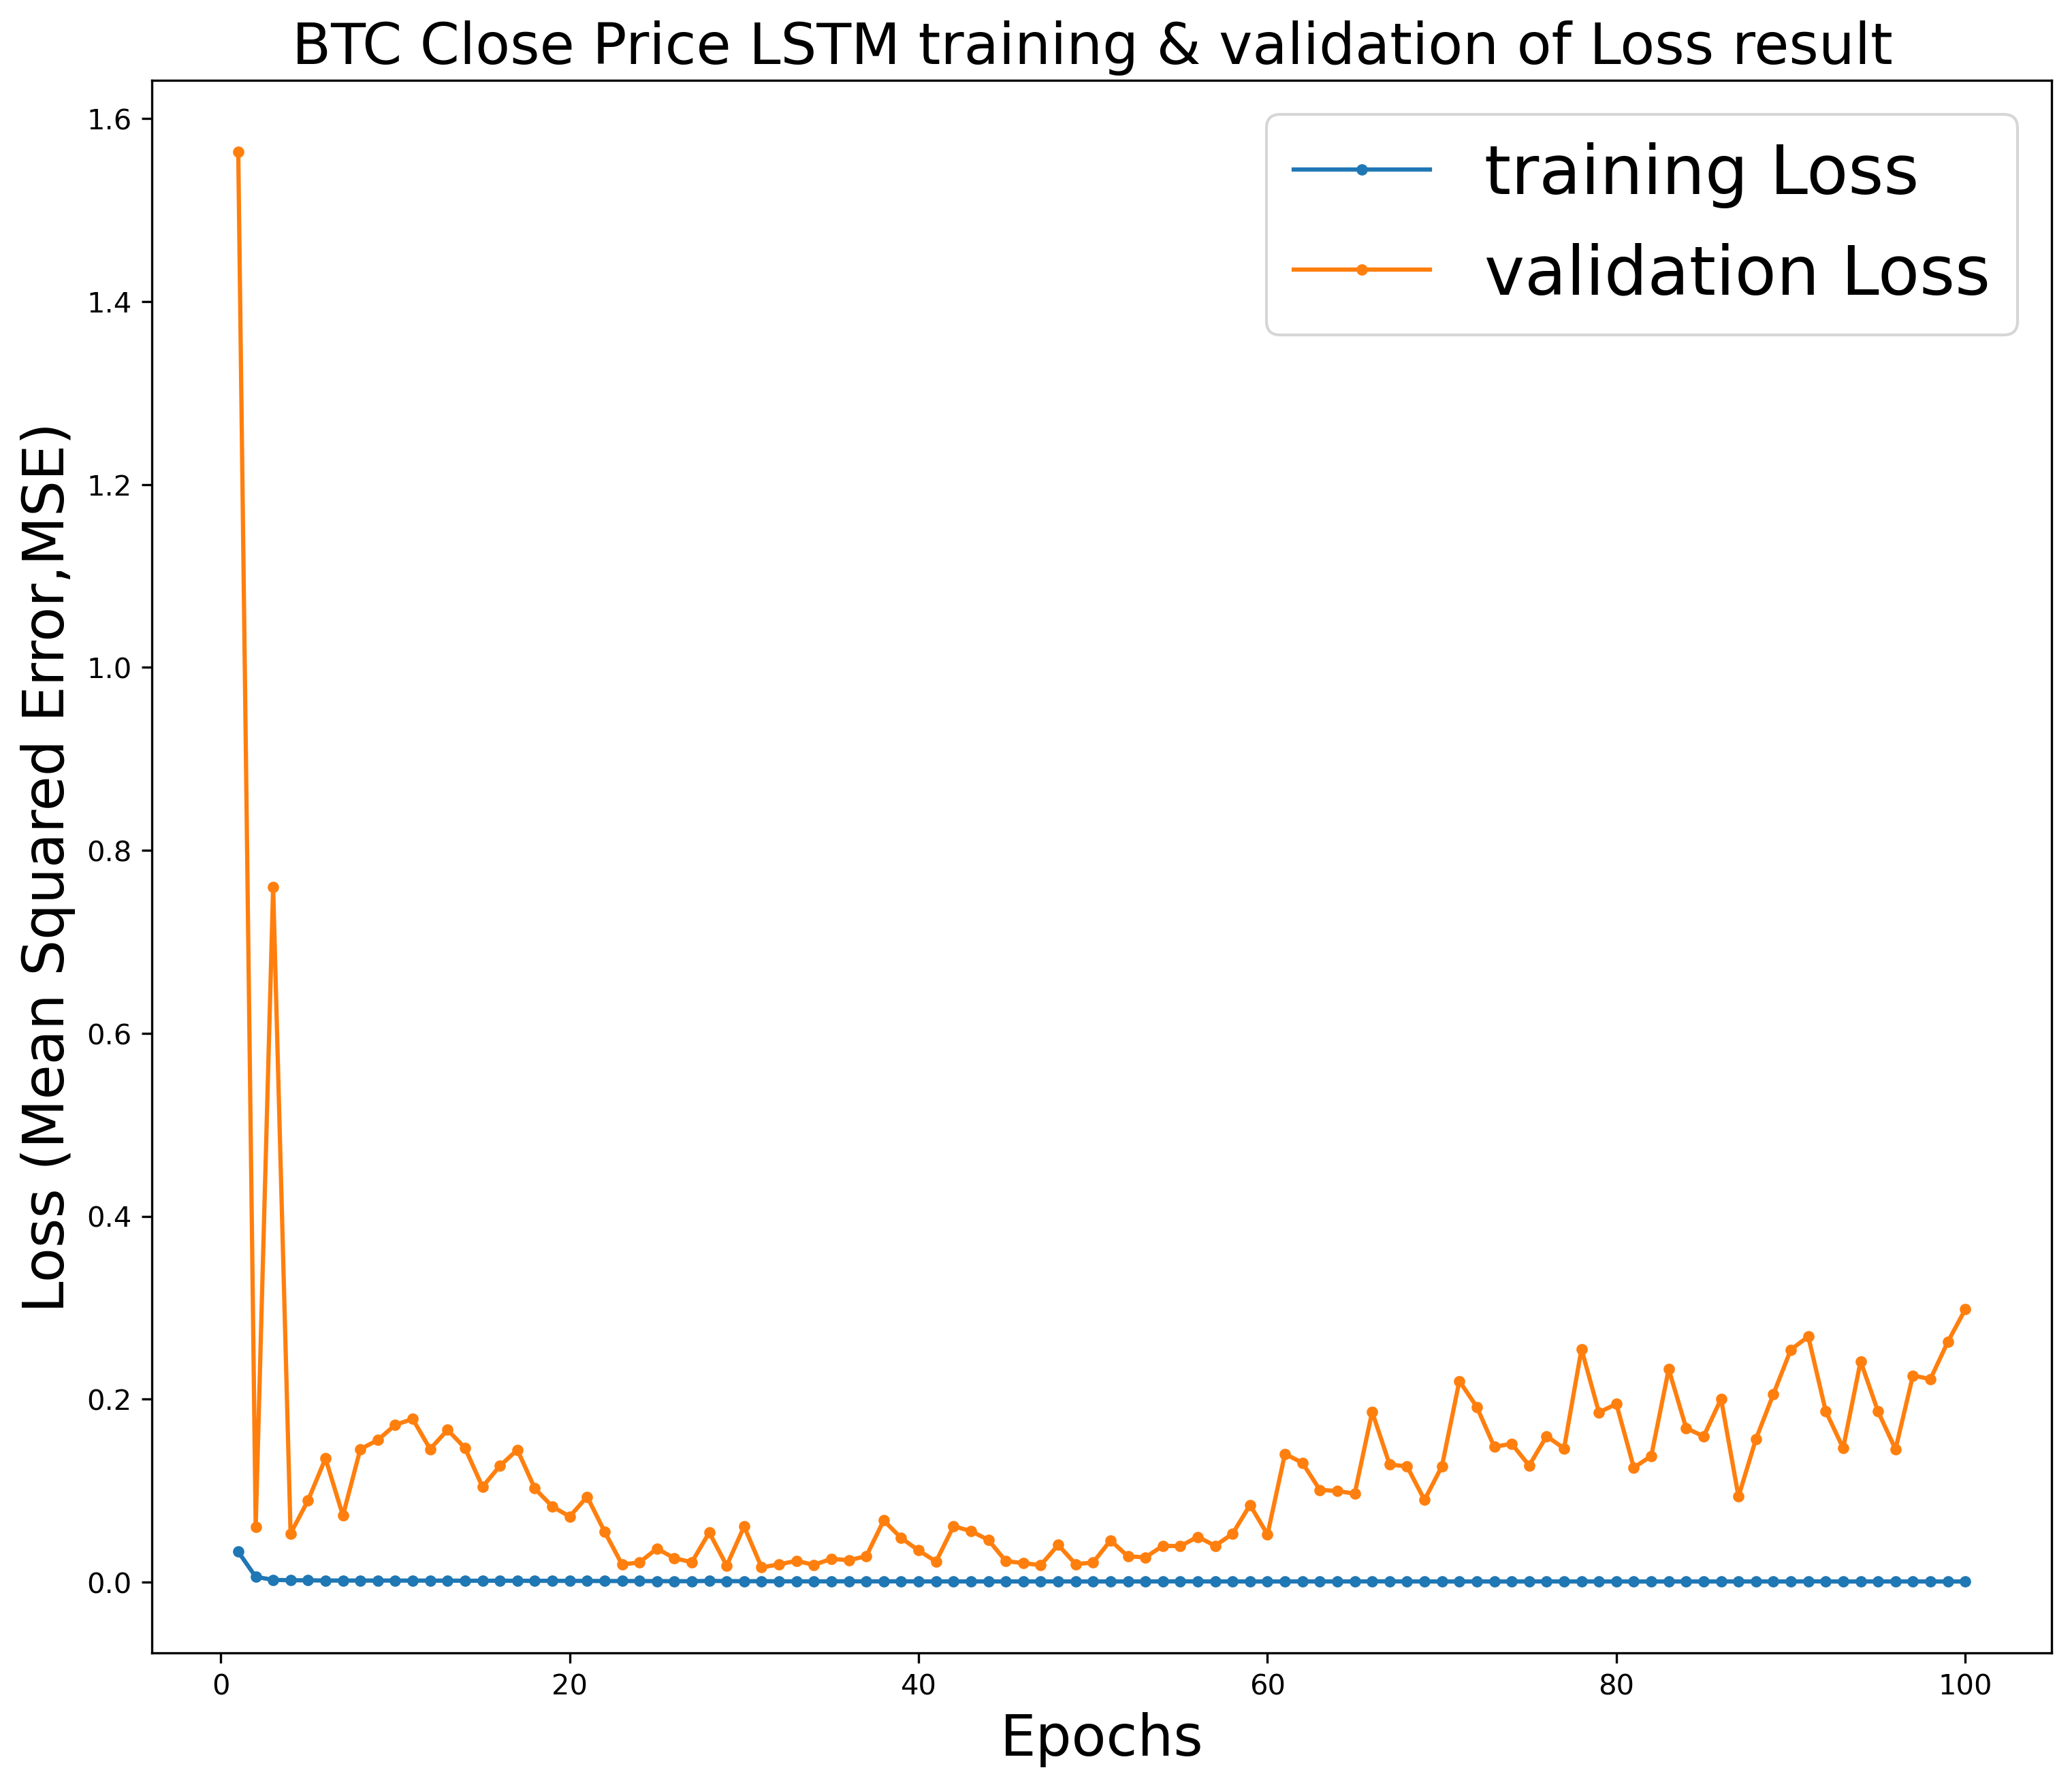

In [28]:
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Mean Squared Error,MSE)',fontsize=20)
plt.title('BTC Close Price LSTM training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [29]:
predicted_price = model.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_price = sc.inverse_transform(predicted_price)
actual_price = sc.inverse_transform(y_test)

11/11 [==============================] - 0s 8ms/step


In [30]:
df1 = pd.DataFrame(predicted_price)
df2 = pd.DataFrame(actual_price)

df1.columns = ['Pred']
df2.columns = ['Actual']

merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv('output2.csv', index=False)

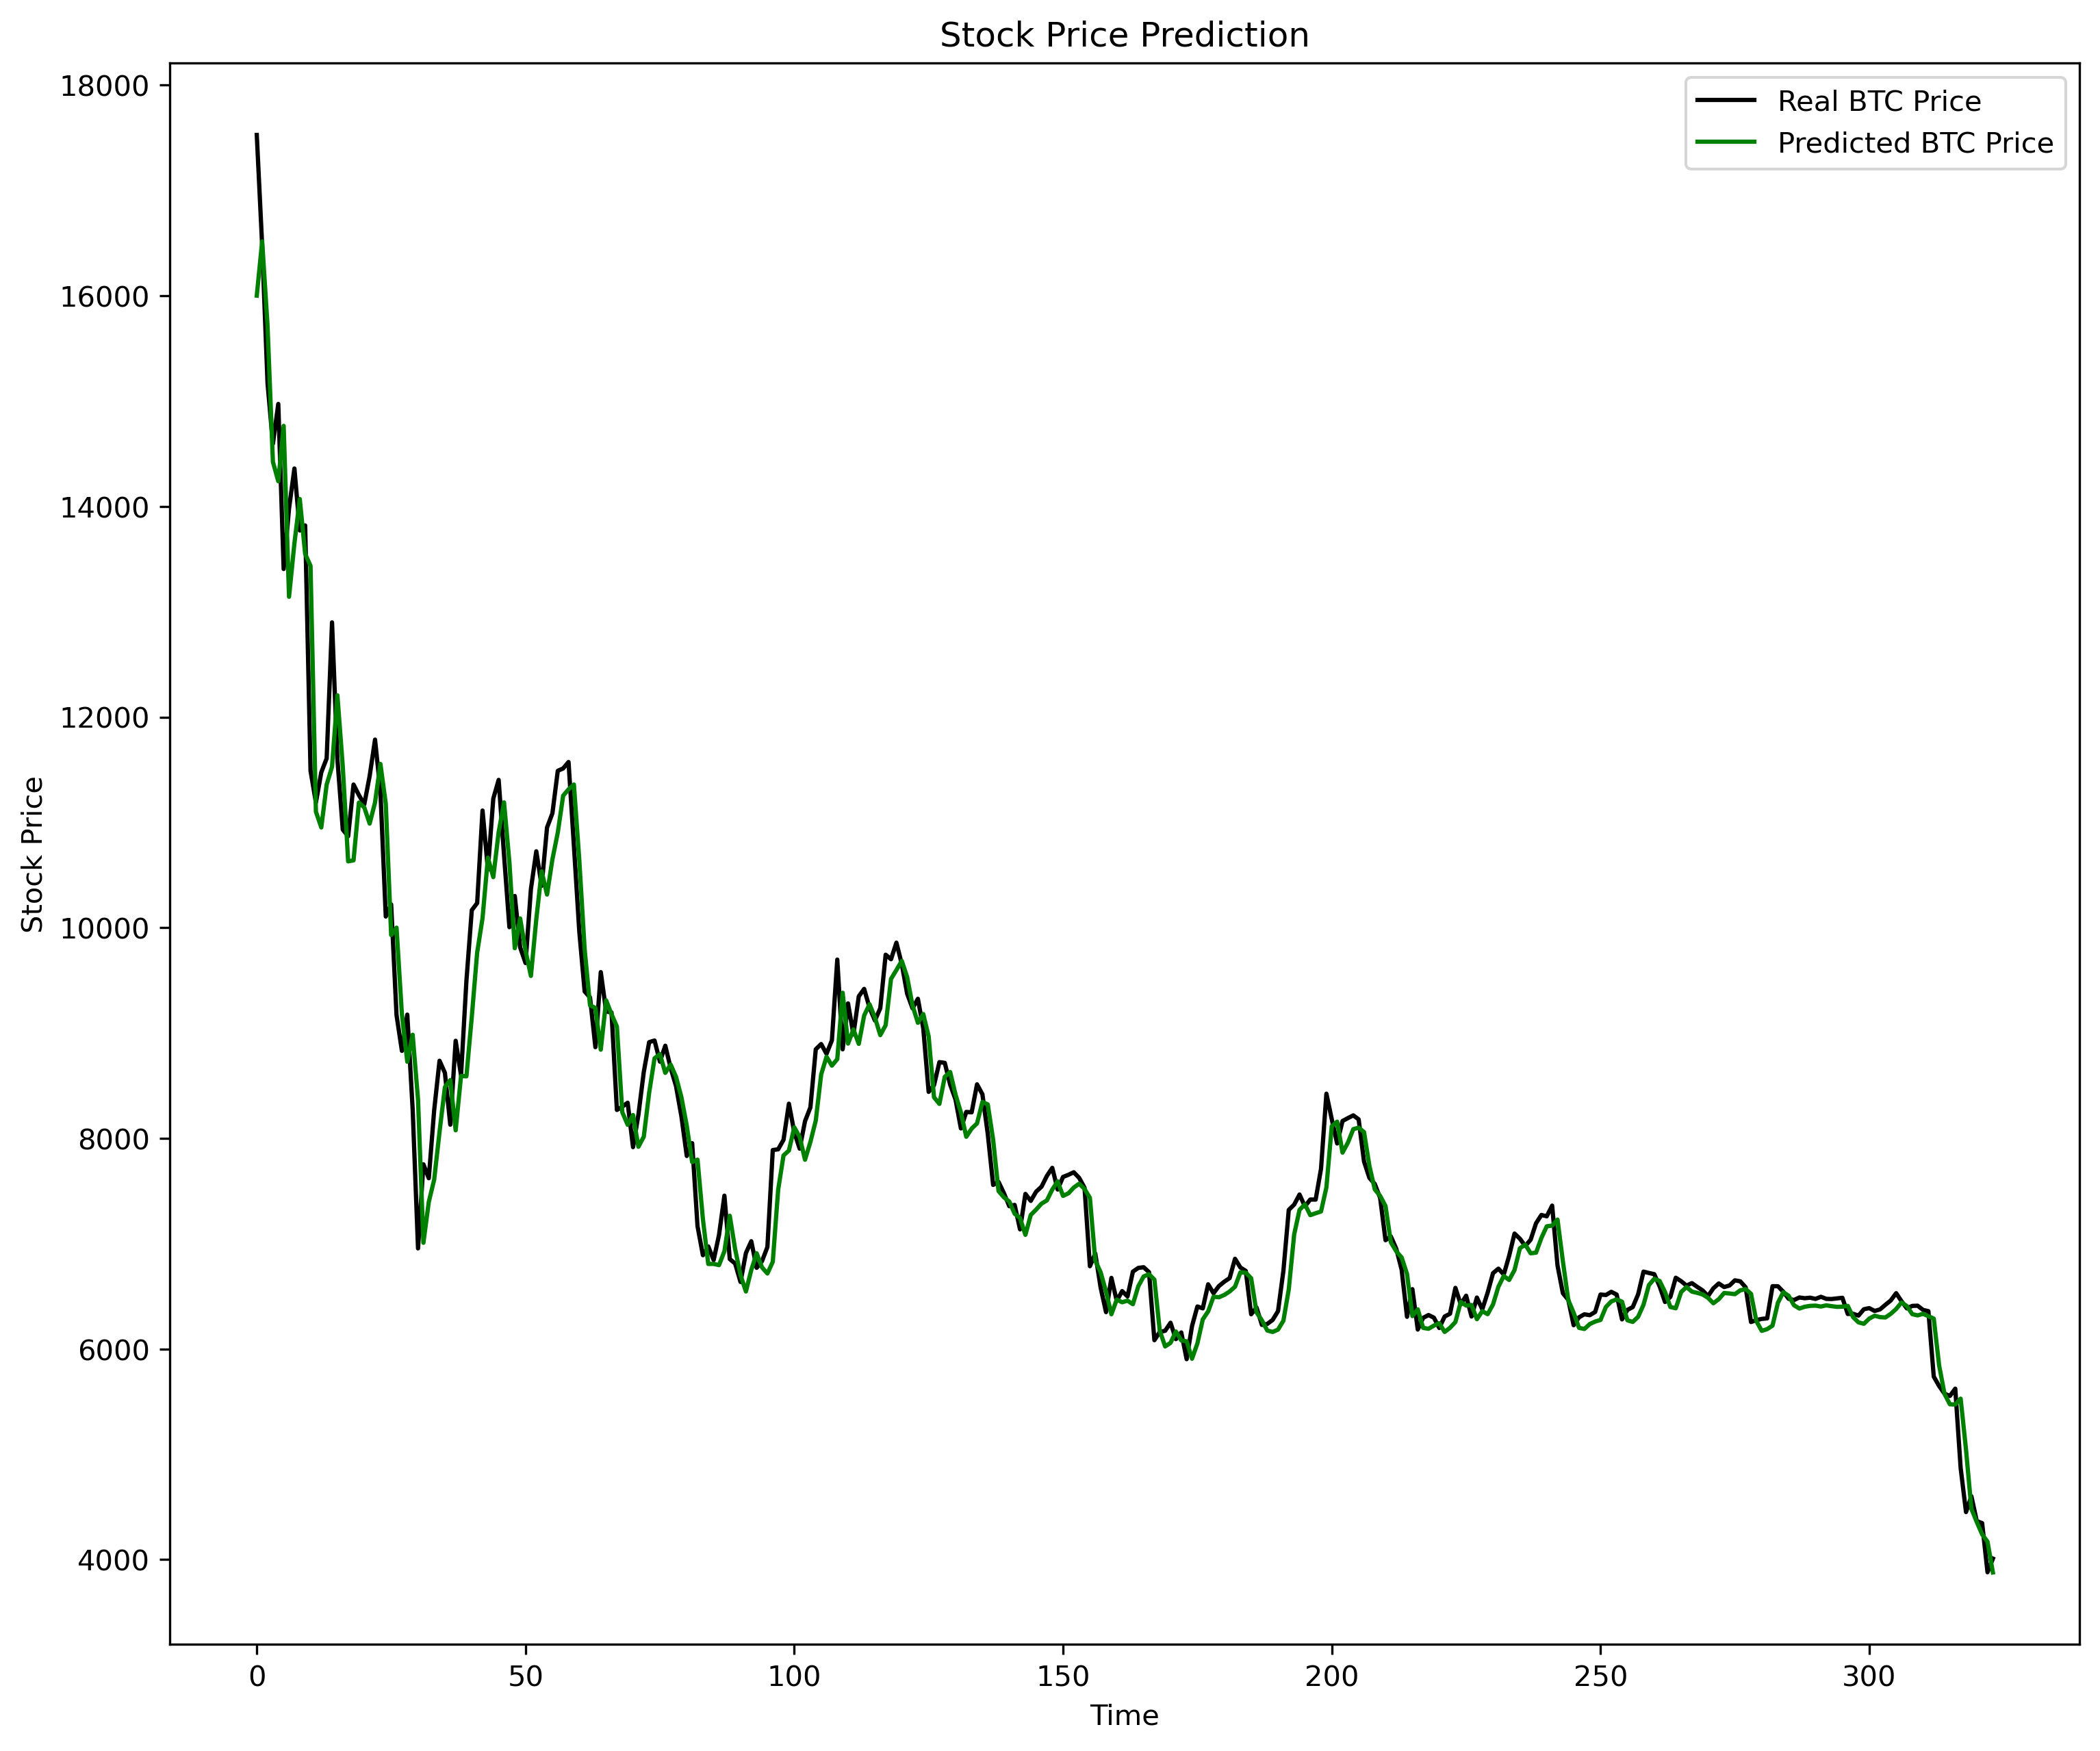

In [31]:
plt.figure(figsize=(12,10),dpi=300)
plt.plot(actual_price, color = 'black', label = 'Real BTC Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted BTC Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [32]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE
    
# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator
    
    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [33]:
predicted_price
actual_price

MAE=mean_absolute_error(actual_price,predicted_price)
MSE=mean_squared_error(actual_price,predicted_price,squared=True)
RMSE=mean_squared_error(actual_price,predicted_price,squared=False)
MAPE=mean_absolute_percentage_error(actual_price,predicted_price)
SMAPE=SMAPE_calulate(actual_price,predicted_price)
RAE=RAE_calculate(actual_price,predicted_price)
MRAE=MRAE_calculate(actual_price,predicted_price)
MdRAE=MdRAE_calculate(actual_price,predicted_price)
RSE=RSE_calculate(actual_price,predicted_price,Root=False)
RRSE=RSE_calculate(actual_price,predicted_price,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 260.415
MSE: 145477.513
RMSE: 381.415
MAPE: 3.129 %
SMAPE: 3.141 %
RAE: 0.17
MRAE: 0.0005250008432730787
MdRAE: 0.133 bench: 7875.385
RSE: 0.036
RRSE: 0.188


# 多變量使用的方法 把切好的原始資料套用方法

In [34]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, single_step=False):
  data = []
  labels = []
  
  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size
  
  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    data.append(dataset[indices])
    
    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])
  
  return np.array(data), np.array(labels)